In [58]:
# Packages
# in CMD - pip install seaborn
#        - pip install ttkthemes
#        - pip install pyqt5
# in Jupyter Notebook - !pip install ttkthemes

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import os
import warnings
warnings.filterwarnings(action='ignore')
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from distutils.util import strtobool
from ttkthemes import ThemedTk
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import pathlib
from pandastable import Table, TableModel

In [59]:
# GUI

ordr = [1,2,3,4,5,6,7,8,9]
t_f = ['False', 'True']
incs = [1,2,5,10]

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askdirectory()
    folder_path.set(filename)

root = ThemedTk(theme='adapta')
root.title("GUI")

# General Inputs
Label(root, text = "General Inputs", font=("Arial Bold", 12)).grid(row = 0, sticky = W)

Label(root, text = "Directory").grid(row = 1, sticky = W)
Label(root, text = "Filename(s) (Please have same first letters if multiple datasheets)").grid(row = 2, sticky = W)
Label(root, text = "Filetype").grid(row = 3, sticky = W)

# For Thermal Data
Label(root, text = "Set Current (A) (Thermal)").grid(row = 4, sticky = W)
Label(root, text = "Reference Temperature (°C) (Thermal)").grid(row = 5, sticky = W)

# For Electrical Data
Label(root, text = "Set Temperature (°C) (Electrical)").grid(row = 6, sticky = W)
Label(root, text = "Reference Current (A) (Electrical)").grid(row = 7, sticky = W)

# General Info
Label(root, text = "Select Source Mode").grid(row = 8, sticky = W)

# Output Info
Label(root, text = "Output Folder Location").grid(row = 10, sticky = W)
# Overwrite or no
Label(root, text = "Allow Overwriting Output Files?").grid(row = 11, sticky = W)

# Graph Options
Label(root, text = "Graph Options", font=("Arial Bold", 12)).grid(row = 12, sticky = W)

# Range for Thermal and Electrical
Label(root, text = "Temperature Range (°C)").grid(row = 13, sticky = W)
Label(root, text = "Current Range (A)").grid(row = 15, sticky = W)

# # of Bins
Label(root, text = "Increments for Temperature Ticks (Default - Increments of 10°C)").grid(row = 14, sticky = W)
Label(root, text = "Increments for Current Ticks (Default - Increments of 1A)").grid(row = 16, sticky = W)
# What order
Label(root, text = "Order (Ex: 1=Linear)").grid(row = 17, sticky = W)
# Show points or no
Label(root, text = "Show Points?").grid(row = 18, sticky = W)
# Export or no as excel worksheet
Label(root, text = "Export as Excel Worksheet?").grid(row = 19, sticky = W)

# Directory of files
folder_path = StringVar()
e0 = ttk.Entry(master=root,textvariable=folder_path)
#e0.insert(0, folder_selected)
dir_button = ttk.Button(text="Browse", command=browse_button)
# Filename(s)
e1 = ttk.Entry(root)
e1.insert(0, "AllColorsCombined")
# Filetype
e2 = ttk.Entry(root)
e2.insert(0, ".xlsx")
# Temps & Amps
e3 = ttk.Entry(root)
e3.insert(0, 6)
e4 = ttk.Entry(root)
e4.insert(0, 40)
e5 = ttk.Entry(root)
e5.insert(0, 40)
e6 = ttk.Entry(root)
e6.insert(0, 6)

# Choose the mode
#e7 = StringVar(root)
#e7.set(mode_options[0])
#drop = ttk.OptionMenu(root,e7,*mode_options)

# Dropdown menu
# e8 = StringVar(root)
#e8.set(curr_options[0])
#drop = OptionMenu(root,e8,*curr_options)

# Output location
e9 = ttk.Entry(root)
e9.insert(0, 'output')
# Dropdown menu
e10 = StringVar(root)
e10.set(t_f[0])
e10x = OptionMenu(root,e10,*t_f)

# Range for Thermal and Electrical
g1a = ttk.Entry(root)
g1a.insert(0, 20)
g1b = ttk.Entry(root)
g1b.insert(0, 90)
g2a = ttk.Entry(root)
g2a.insert(0, 0)
g2b = ttk.Entry(root)
g2b.insert(0, 13)

# Dropdown menu
g3 = StringVar(root)
g3.set(incs[3])
g3x = OptionMenu(root,g3,*incs)

# Dropdown menu
g4 = StringVar(root)
g4.set(incs[0])
g4x = OptionMenu(root,g4,*incs)


# Dropdown menu
g5 = StringVar(root)
g5.set(ordr[1])
g5x = OptionMenu(root,g5,*ordr)

# Dropdown menu
g6 = StringVar(root)
g6.set(t_f[0])
g6x = OptionMenu(root,g6,*t_f)

# Dropdown menu
g7 = StringVar(root)
g7.set(t_f[0])
g7x = OptionMenu(root,g7,*t_f)

e0.grid(row = 1, column = 1)
dir_button.grid(row=1, column=2)
e1.grid(row = 2, column = 1)
e2.grid(row = 3, column = 1)
e3.grid(row = 4, column = 1)
e4.grid(row = 5, column = 1)
e5.grid(row = 6, column = 1)
e6.grid(row = 7, column = 1)
#drop.grid(row = 8, column = 1)
e9.grid(row = 10, column = 1)
e10x.grid(row = 11, column = 1)

g1a.grid(row = 13, column = 1)
g1b.grid(row = 13, column = 2)
g2a.grid(row = 15, column = 1)
g2b.grid(row = 15, column = 2)
g3x.grid(row = 14, column = 1)
g4x.grid(row = 16, column = 1)
g5x.grid(row = 17, column = 1)
g6x.grid(row = 18, column = 1)
g7x.grid(row = 19, column = 1)

def getInput():

    a = e0.get()
    b = e1.get()
    c = e2.get()
    d = int(e3.get())
    e = int(e4.get())
    f = int(e5.get())
    g = int(e6.get())
    #h = e7.get()
    j = e9.get()
    k = e10.get()
    l = int(g1a.get())
    m = int(g1b.get())
    n = int(g2a.get())
    o = int(g2b.get())
    p = int(g3.get())
    q = int(g4.get())
    r = int(g5.get())
    s = g6.get()
    t = g7.get()
    root.destroy()

    global overall
    overall = [a,b,c,d,e,f,g,j,k,l,m,n,o,p,q,r,s,t]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
    
ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [60]:
# Kill script if GUI has empty spots

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

if '' in overall:
    Mbox('Error!', 'At least one entry in the GUI is empty - please fix', 0)
    sys.exit() # Kill script

In [61]:
# Input info
directory = pathlib.Path(overall[0])  # Provide the location of the excel files * Please use forward slashes
name = overall[1]  #*RA* Provide the model a.k.a. everything before the temperature (prob change here)
file_type = overall[2]  # If reading in multiple files - they all have to be the same file type

# For thermal Data
set_current = overall[3]  # default: 6
ref_temp = overall[4]

# For electrical data
set_temp = overall[5]
ref_current = overall[6]  # default: 6

# General info
# current_info = 'A'  # Amps or milliamps

# Colors: 'DR', 'RA', 'CG-small', 'CG-large', 'B-small', 'B-large'
# type_col = ['DR', 'RA', 'CG', 'B-']  # Select the colors (Reds are a group, green are a group, and blue are a group)
                         # Only put in first two characters: DR, RA, CG, B-

# Output info
output_f = overall[7]  # <- This is where the folder where you would like to put all the images of the graphs
                     # NOTE: Put the desired location of where the folder is located here
                     # If the file is in the same location as your directory, all you need to do is put the folder name here
                     # * NO backward slashes only forward
            
# Allow Overwriting or no? - Default=False
over = bool(strtobool(overall[8]))

In [6]:
# Select the columns you want from the excel spreadsheet

select_cols = ['Comment', 'Type', 'Source mode - Currentsource',  'Source current - Currentsource / A', 'Voltage  - Currentsource / V', 'Radiometric / W', 
         'Photometric / lm', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
         'Centroid Wavelength / nm', 'Dominant Wavelength / nm', 'CCT / K', 'CRI', 'Red Effect / %', 'Width50 / nm',
         'Set Temperature - LED870 / °C']


# 'Last Dark Current / min', 'Signal Level / Counts', 'Signal Level / %', 'Scotopic / lm', 'UVA / W', 'UVB / W', 'UVC / W', 
# 'VIS / W', 'Tristimulus_X / lm', 'Tristimulus_Y / lm', 'Tristimulus_Z / lm', 'z - Color Coordinates', 'u - Color Coordinates', 
# 'v1960 - Color Coordinates', 'v1976 - Color Coordinates', 'CRI', 'Red Effect / %', 'Vis Effect / %', 'CCT / K',


# Original name for temperature column
cols_temp = 'Set Temperature - LED870 / °C'
# Original name for current column
cols_curr = 'Source current - Currentsource / A'
# Original name for pulse column
cols_puls = 'Source mode - Currentsource' # Don't add pulse column into renamed area as it gets dropped


# Add columns here for any calculations
# Calculated columns will be appended to the dataframe
#column_d = ['Voltage  - Currentsource / V', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
        #    'Dominant Wavelength / nm', 'Centroid Wavelength / nm'] # Change (-) columns
#column_p = ['Radiometric / W', 'Photometric / lm'] # Relative (%) columns

# Here: rename all selected columns & calculated columns - don't forget calculated columns are added towards the end
# Change columns first then relative columns

column_rn = ['Type & Source Mode', 'Δ Forward Voltage (Vf)', 'Δ CIEx', 'Δ CIEy', 'Δ Peak Wavelength (λp)', 'Δ Dominant Wavelength (λd)', 
             'Δ Centroid Wavelength (λcen)', 'Δ CCT / K', 'Δ CRI', 'Δ R 9', 'Δ FWHM', 'Relative Radiant Power', 'Relative Luminous Flux', 'lf (A)', 'Tj (°C)']


# 'Last Dark Current (min)', 'Signal Level (counts)', 'Signal Level (%)', 'Scotopic Luminous Flux', 'UVA (W)', 'UVB (W)', 
# 'UVC (W)', 'VIS (W)', 'TRIx', 'TRIy', 'TRIz', 'CIEz', 'CIEu', 'v1960', 'v1976', 'Width (nm)', 'CRI', 'Red Effect (%)', 
# 'Vis Effect (%)', 'CCT',

In [7]:
# IMPORTANT - OUTPUT
# Select columns here from the *RENAMED COLUMNS list above* - this is what outputs the graphs
# Add more columns & titles here if necessary

# Renamed name of temperature and current column
xt = 'Tj (°C)'
xc = 'lf (A)'

y1 = 'Δ Forward Voltage (Vf)'
y1tt = 'ΔVf vs. Tj \n ΔVf = V(Tj) - V(' + str(ref_temp) + '¡C) ' + ' If = ' + str(set_current) + 'A'
y1te = 'ΔVf vs. lf \n ΔVf = V(lf) - V(' + str(ref_current) + 'A) ' + ' Tj = ' + str(set_temp) + '°C'

y2 = 'Relative Radiant Power'
y2tt = 'Relative Radiant Power  vs. Tj \n φv/φv(' + str(ref_temp) + '¡C) ' + ' If = ' + str(set_current) + 'A'
y2te = 'Relative Radiant Power vs. lf \n φv/φv(' + str(ref_current) + 'A) ' + ' Tj = ' + str(set_temp) + '°C'

y3 = 'Relative Luminous Flux'
y3tt = 'Relative Luminous Flux  vs. Tj \n φv/φv(' + str(ref_temp) + '¡C) ' + ' If = ' + str(set_current) + 'A'
y3te = 'Relative Luminous Flux vs. lf \n φv/φv(' + str(ref_current) + 'A) ' + ' Tj = ' + str(set_temp) + '°C'

y4 = 'Δ Peak Wavelength (λp)'
y4tt = 'Peak Wavelength'
y4te = 'Peak Wavelength'

y5 = 'Δ Dominant Wavelength (λd)'
y5tt = 'Dominant Wavelength'
y5te = 'Dominant Wavelength'

y6 = 'Δ Centroid Wavelength (λcen)'
y6tt = 'Cen Wavelength'
y6te = 'Cen Wavelength'

y7 = 'Δ CCT / K'
y7tt = 'CCT / K'
y7te = 'CCT / K'

y8 = 'Δ CRI'
y8tt = 'CRI'
y8te = 'CRI'

y9 = 'Δ R 9'
y9tt = 'R 9'
y9te = 'R 9'

y10 = 'Δ FWHM'
y10tt = 'FWHM'
y10te = 'FWHM'

# CIEx & y column names here:
y11 = 'Δ CIEx'
y11tt = 'Chromaticity Shift vs. Tj \n ΔCIEx = CIEx(Tj) - CIEx(' + str(ref_temp) + '¡C)  ' + ' If = ' + str(set_current) + 'A'
y11te = 'Chromaticity Shift vs. lf \n ΔCIEx = CIEx(lf) - CIEx(' + str(ref_current) + 'A)  ' + ' Tj = ' + str(set_temp) + '°C'

y12 = 'Δ CIEy'
y12tt = 'Chromaticity Shift vs. Tj \n ΔCIEy = CIEy(Tj) - CIEy(' + str(ref_temp) + '¡C)  ' + ' If = ' + str(set_current) + 'A'
y12te = 'Chromaticity Shift vs. lf \n ΔCIEy = CIEy(lf) - CIEy(' + str(ref_current) + 'A)  ' + ' Tj = ' + str(set_temp) + '°C'

# Show all of y variables (number of columns that we would like outputs for), only change if removing or adding columns
y_n = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12]
y_nt = [y1tt,y2tt,y3tt,y4tt,y5tt,y6tt,y7tt,y8tt,y9tt,y10tt,y11tt,y12tt]
y_ne = [y1te,y2te,y3te,y4te,y5te,y6te,y7te,y8te,y9te,y10te,y11te,y12te]

row_size = 6 # Make sure row and column size can accomodate all the subplots
column_size = 2
ax_n = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1), (5,0), (5,1)] # the axes for the subplots


# ALSO - change x range if necessary
# Thermal by default is 20-90 Celsius
xt1 = overall[9]
xt2 = overall[10]

# Electrical by default is 0-10 Amps
xe1 = overall[11]
xe2 = overall[12]

# Number of bins for therm and elect
t_bins = overall[13]
e_bins = overall[14]

# Graph order number - 1 = linear, 2 = quadratic, 3 = cubic, etc.
ord_num = overall[15]

# Show points or no?
show_pt = bool(strtobool(overall[16]))

# Show points or no?
exp = bool(strtobool(overall[17]))

In [8]:
# Change directory to desired location
os.chdir(directory)
pathlib.Path.cwd()

WindowsPath('C:/Users/Chelton Kuang/Documents')

In [9]:
# Check whether the specified path exists or not
isExist = os.path.exists(output_f)

if not isExist:
  
  # Create output dir if doesn't exist
  os.makedirs(output_f)
  Mbox("Create output dir", "The output directory has been created: " + output_f, 0)

In [10]:
# Identifies all filenames in the directory

filesnames = os.listdir()
filesnames = [f for f in filesnames if (f.startswith(name) and f.lower().endswith(file_type))]

# Read in excel files as dataframe

# Here we concat similarly named files together - nice for putting together different test datasets on the same chips

df = pd.concat(map(pd.read_excel, filesnames)) # Change to read_csv for csv files
df

,Type,Number,Comment,Integration Time / ms,Averages,Filter,Serial Number,CCD Temperature,DC Temperature,Last Dark Current / min,...,Zhaga flux category,Zhaga book 1 flux category,Desktop,Tolerance Time - LED870 / s,Voltage - LED870 / V,Current - LED870 / A,Currentsource,Control mode - Currentsource,Compliance - Currentsource / V,Voltage range - Currentsource / V
0,DR,1,2000022171,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,1.1,...,NaN,NaN,NaN,3.0,-2.03,-0.77,Vektrex_SN3800-1462,Triggered,20.0,20.0
1,DR,2,2000022171,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,1.7,...,NaN,150,NaN,3.0,-1.83,-0.77,Vektrex_SN3800-1462,Triggered,20.0,20.0
2,DR,3,2000022171,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,1.9,...,NaN,"150, 250",NaN,3.0,-1.94,-0.74,Vektrex_SN3800-1462,Triggered,20.0,20.0
3,DR,4,2000022171,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,2.0,...,NaN,250,NaN,3.0,-2.07,-0.88,Vektrex_SN3800-1462,Triggered,20.0,20.0
4,DR,5,2000022171,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,2.2,...,NaN,"250, 350",NaN,3.0,-1.94,-0.80,Vektrex_SN3800-1462,Triggered,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,RA,9,2000022192-RA,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,29.6,...,NaN,250,NaN,3.0,-14.88,-4.68,Vektrex_SN3800-1462,Triggered,20.0,20.0
2726,RA,10,2000022192-RA,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,29.8,...,NaN,250,NaN,3.0,-14.86,-4.74,Vektrex_SN3800-1462,Triggered,20.0,20.0
2727,RA,11,2000022192-RA,15.0,1.0,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,29.9,...,NaN,150,NaN,3.0,-14.66,-4.60,Vektrex_SN3800-1462,Triggered,20.0,20.0
2728,RA,12,2000022192-RA,15.0,1.0,OD2,026214418;18-0762,-10.18 °C,-10.61 °C,30.1,...,NaN,150,NaN,3.0,-14.93,-4.71,Vektrex_SN3800-1462,Triggered,20.0,20.0


In [11]:
# Double check if imported worksheets are not empty - if empty, script is killed

if df.empty:
    Mbox('Error!', 'Imported worksheets are empty', 0)
    sys.exit() # Kill script

In [12]:
# Double check if expected columns are not missing

try:
    df = df[select_cols]
except KeyError as e:
    Mbox('Error!', repr(e) + '\n Fix then Restart & Run All', 0)
    sys.exit() # Kill script

In [13]:
# If Voltage above 200v, point out row and drop

df_200v = df[df['Voltage  - Currentsource / V'] >= 200]
df = df[df['Voltage  - Currentsource / V'] < 200]
if not df_200v.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations above 200v which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=df_200v,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'At least one observation has voltage above 200v \n they will be dropped', 0)

# Normalized By Source Mode

In [14]:
# Get unique source modes
df['Comment'] = df['Comment'].astype(str)
df = df.dropna()
mode_options = list(df['Source mode - Currentsource'].unique())

In [15]:
# GUI for selecting which mode

root = ThemedTk(theme='arc')
root.title("GUI for Source Mode Selection")

Label(root, text = "Select Source Mode").grid(row = 1, sticky = W)

e7 = StringVar(root)
e7.set(mode_options[0])
drop = ttk.OptionMenu(root,e7,*mode_options)

drop.grid(row = 1, column = 1)
    
def kill():
    global h
    h = e7.get()
    root.destroy()
    
ttk.Button(root, text = "Submit",
           command = kill).grid(sticky = E, row = 50)

root.mainloop()

##pulse_width = overall[7] # Source mode

In [16]:
# Select columns needed - ADD OR REMOVE AS NEEDED

dfa = df[df[cols_puls] == h]
dfa[cols_puls] = dfa[cols_puls].str.title()

# Single Pulse

# dfa = dfa[dfa['Type'].str[:2].isin(type_col)]  # Restrict type to either reds or blues & greens
dfa['Type & Source Mode'] = dfa['Type'] + ', ' + dfa[cols_puls]
dfa = dfa.drop(['Type', cols_puls], axis=1)
#dfa

In [17]:
# Check for any zeros

xdl = []
xd = dfa[(dfa.iloc[:,1:4] == 0).any(axis=1)]
for i in xd['Comment'].unique():
    xdl.append(i)

if not xd.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations with zeros which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=xd,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'Please double-check these serial numbers - ' + str(xdl) + '\n The rows will be dropped.', 0)

In [18]:
# Drop any rows that have 0s
indices = dfa.loc[(dfa.iloc[:,1:4] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    dfa = dfa.drop(ind)
    
# Check if dataframe is empty
if dfa.empty:
    Mbox('Error!', 'The dataframe is empty', 0)
    sys.exit() # Kill script

In [19]:
# Mean calculations for baseline
dfa = dfa.groupby([ 'Type & Source Mode', 'Source current - Currentsource / A', 'Set Temperature - LED870 / °C']).mean().reset_index()
#df

In [20]:
# Filtering for thermal data and electrical data (identify set amps / temp)

# Set Amps = 6 A (Thermal Data)
therm = dfa[dfa[cols_curr] == set_current]
therm = therm.reset_index(drop=True)

# Set Temp = 40 C (Electrical Data)
elect = dfa[dfa[cols_temp] == set_temp]
elect = elect.reset_index(drop=True)

# If set temp/current doesn't exist, kill script and show error
if therm.empty or elect.empty:
    Mbox('Error!', 'Please double-check if selected set temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

In [21]:
# Create column 'mean' as baseline

# Thermal
thermx = therm[therm[cols_temp] == ref_temp]
#thermx.loc['mean'] = thermx.mean()
#last_row = thermx.tail(1)
#therm = therm.append(last_row)
#therm.tail()
#thermx

In [22]:
# Calculations
test = (therm.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]-thermx.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]
        .reindex(therm['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = (therm.set_index('Type & Source Mode').iloc[:,[3,4]] / thermx.set_index('Type & Source Mode').iloc[:,[3,4]]
                .reindex(therm['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
thermz = pd.concat([test, test2, therm.iloc[:,1:3]], axis=1)

In [23]:
# Electrical

electx = elect[elect[cols_curr] == ref_current]
#electx.loc['mean'] = electx.mean()
#last_row = electx.tail(1)
#elect = elect.append(last_row)
#electx

In [24]:
# Calculations
test = (elect.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]-electx.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]
        .reindex(elect['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = (elect.set_index('Type & Source Mode').iloc[:,[3,4]] / electx.set_index('Type & Source Mode').iloc[:,[3,4]]
                .reindex(elect['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
electz = pd.concat([test, test2, elect.iloc[:,1:3]], axis=1)

In [25]:
# If reference temp/current doesn't exist, kill script and show error
if thermx.empty or electx.empty:
    Mbox('Error!', 'Please double-check if selected reference temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

In [26]:
# Rename columns for thermal data

thermz.columns = column_rn
electz.columns = column_rn

In [27]:
# Horizontal baseline
thermz_m = thermz[thermz['Tj (°C)'] == ref_temp].iloc[0]
electz_m = electz[electz['lf (A)'] == ref_current].iloc[0]

In [28]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])
        
        QtWidgets.QMainWindow.__init__(self)
        title = name + ' - By Type & Source Mode'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

In [29]:
# Function for version checking saved images for pngs

def version_png(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    f.savefig('{}{:d}.png'.format(filename, i))

In [30]:
'''

# Create if statements for different color palettes
    
pal = {c:'darkred' if 'DR' in c else 'red' if 'RA' in c else 'lightgreen' if 'CG-l' in c else 'green' if 'CG-s' in c
      else 'lightblue' if 'B-l' in c else 'blue' for c in df['Type & Source Mode'].unique()}
      
''';

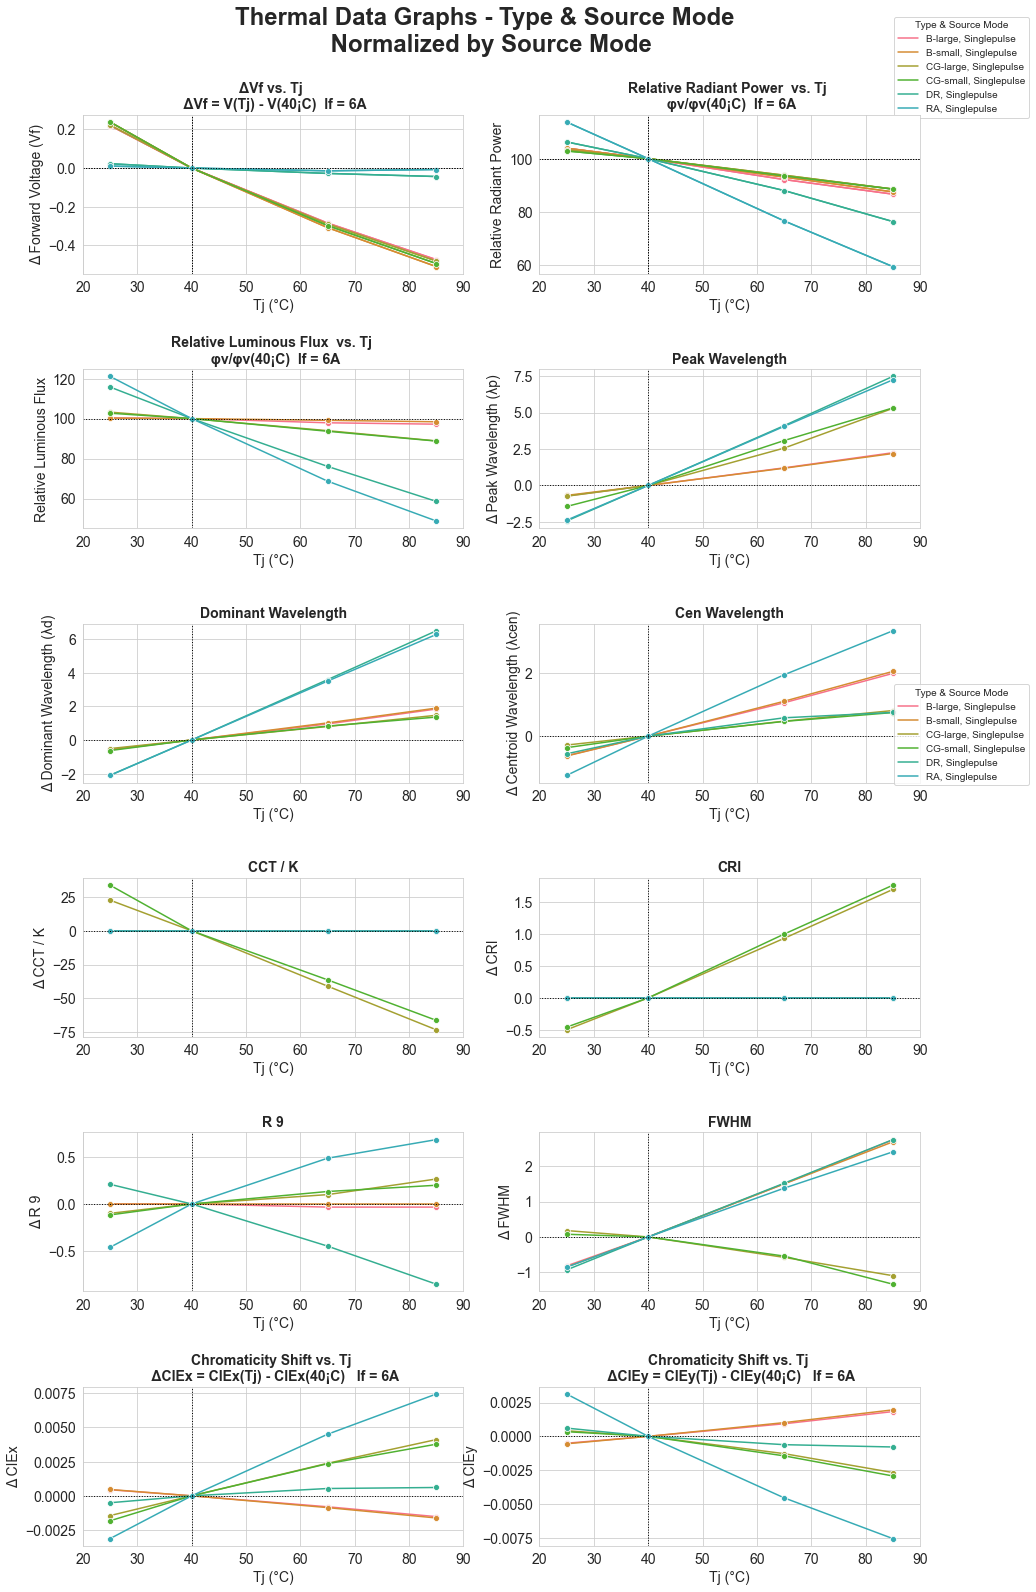

In [32]:
# Type & Source Graphs must be separate

# Thermal - By Type & Source Mode

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

#plt.figure('Thermal Data - By Type & Source Mode - ' + type_col[0] + ', ' + type_col[1], clear=True)
sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Thermal Data Graphs - Type & Source Mode \n Normalized by Source Mode', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lineplot(ax=axes[d], x=xt, y=a, hue="Type & Source Mode", data=thermz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    c.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    c.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 & c2 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xt, y=y1, hue="Type & Source Mode", data=thermz, ci=False, marker='o')

axes[0,0].set_title(y1tt, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xt1, xt2))
c1.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
c1.axhline(thermz_m[y1] ,ls='dotted', color='black', linewidth=1)
c1.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.5, 1.3), ncol=1).set_title('Type & Source Mode')

c2 = sns.lineplot(ax=axes[0,1], x=xt, y=y2, hue="Type & Source Mode", data=thermz, ci=False, marker='o')

axes[0,1].set_title(y2tt, fontweight = 'bold', fontsize = 14)
c2.set(xlim=(xt1, xt2))
c2.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
c2.axhline(thermz_m[y2] ,ls='dotted', color='black', linewidth=1)
c2.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
c2.legend(loc='right', bbox_to_anchor=(1.3, -2.9), ncol=1).set_title('Type & Source Mode')
c2.set_zorder(1)

# pass the figure to the custom window
a = ScrollableWindow(f);
    
# Save the figure as png

if over == False:
    fname = output_f + '/' + name + '_' + h + '_therm_'
    version_png(fname)
else:
    f.savefig(output_f + '/' + name + '_' + h + '_therm.png')

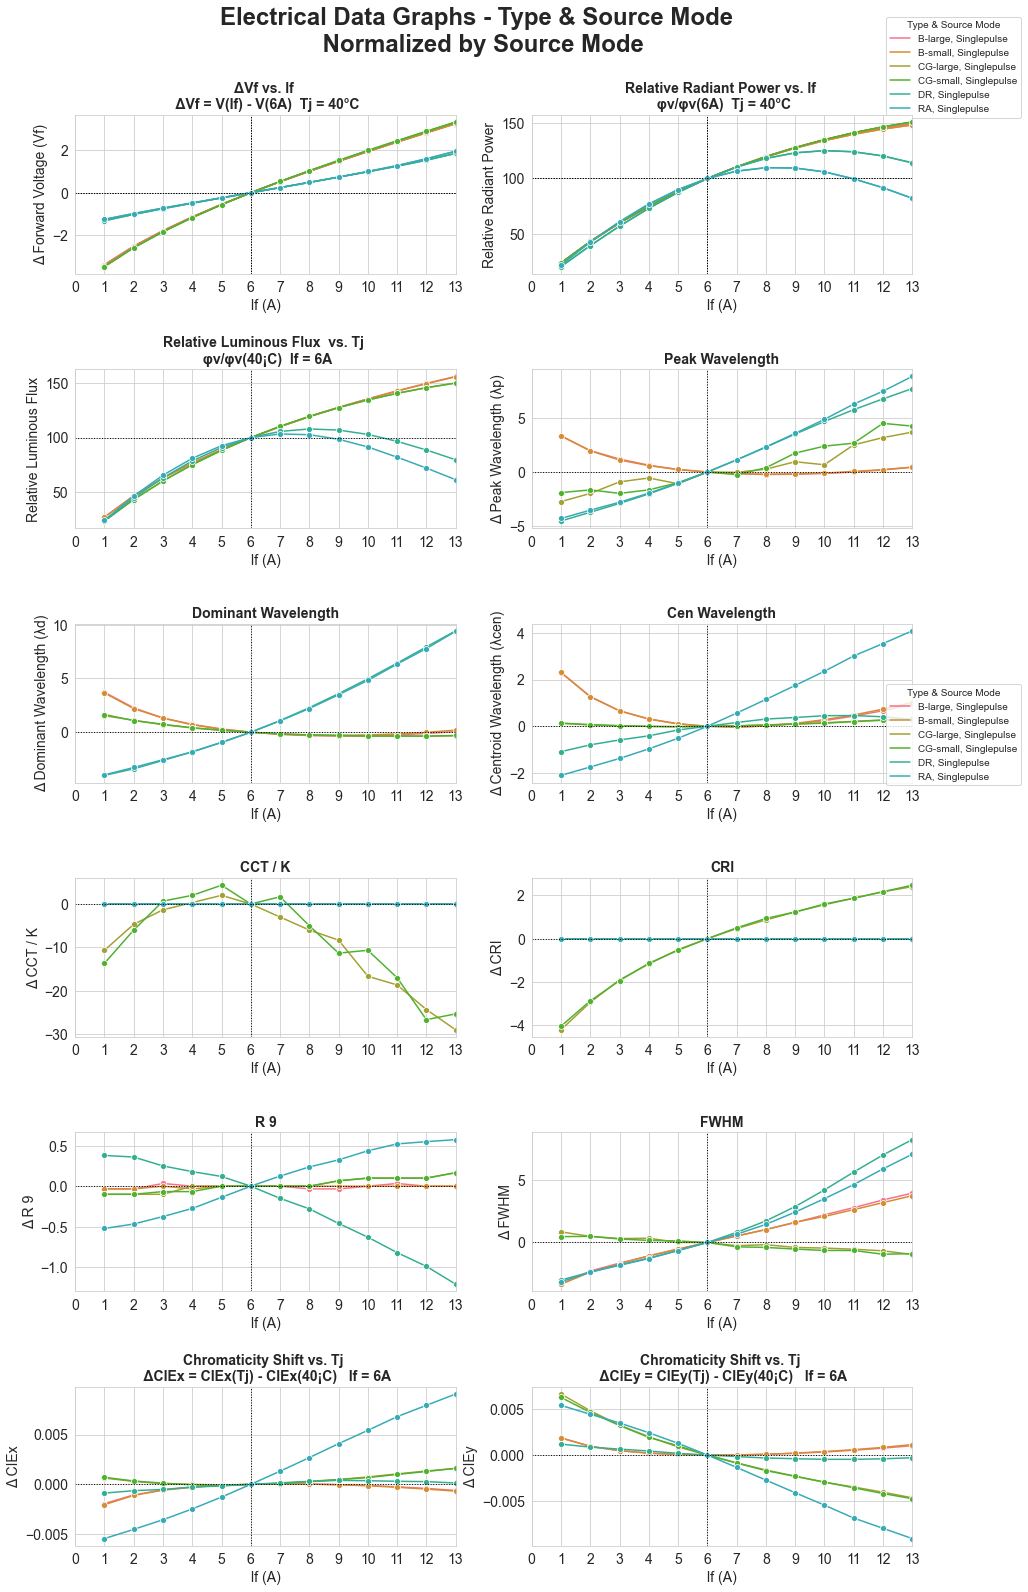

In [33]:
# Electrical by Type & Source Mode

#plt.figure('Electrical Data - By Type & Source Mode - ' + type_col[0] + ', ' + type_col[1], clear=True)
sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Electrical Data Graphs - Type & Source Mode \n Normalized by Source Mode', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lineplot(ax=axes[d], x=xc, y=a, hue="Type & Source Mode", data=electz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    c.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    c.axvline(ref_current, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 & c2 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xc, y=y1, hue="Type & Source Mode", data=electz, ci=False, marker='o')

axes[0,0].set_title(y1te, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xe1, xe2))
c1.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
c1.axhline(electz_m[y1] ,ls='dotted', color='black', linewidth=1)
c1.axvline(ref_current, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.5, 1.3), ncol=1).set_title('Type & Source Mode')

c2 = sns.lineplot(ax=axes[0,1], x=xc, y=y2, hue="Type & Source Mode", data=electz, ci=False, marker='o')

axes[0,1].set_title(y2te, fontweight = 'bold', fontsize = 14)
c2.set(xlim=(xe1, xe2))
c2.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
c2.axhline(electz_m[y2] ,ls='dotted', color='black', linewidth=1)
c2.axvline(ref_current, ls='dotted', color='black', linewidth=1)
c2.legend(loc='right', bbox_to_anchor=(1.3, -2.9), ncol=1).set_title('Type & Source Mode')
c2.set_zorder(1)

# pass the figure to the custom window
a = ScrollableWindow(f);
    
# Save the figure as png

if over == False:
    fname = output_f + '/' + name + '_' + h + '_elect_'
    version_png(fname)
else:
    f.savefig(output_f + '/' + name + '_' + h + '_elect.png')

In [34]:
# Individual Thermal Graphs by Source Mode
'''
for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lmplot(x=xt, y=a, hue="Type & Source Mode", data=thermz, ci=False, legend=True, scatter=show_pt, order=ord_num
                  , aspect = 1.8)
    #plt.get_current_fig_manager().canvas.set_window_title(a + ' - Thermal Data by Type & Source Mode \n Normalized by Source Mode')

    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    plt.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
    plt.axvline(xt2, color='0.8')
''';

In [35]:
# Individual Electrical Graphs by Source Mode
'''
for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lmplot(x=xc, y=a, hue="Type & Source Mode", data=electz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                aspect = 1.8)
    #plt.get_current_fig_manager().canvas.set_window_title(a + ' - Electrical Data by Type & Source Mode \n Normalized by Source Mode')
    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    plt.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_current, ls='dotted', color='black', linewidth=1)
    plt.axvline(xe2, color='0.8')
''';

In [36]:
# Export as Excel Worksheet if needed

if exp == True:
    with pd.ExcelWriter(output_f + '/' + name + '_' + h + '_output.xlsx') as writer:  
        thermz.to_excel(writer, sheet_name='Thermal Data', index=False)
        electz.to_excel(writer, sheet_name='Electrical Data', index=False)
else:
    pass

# Normalized By Type

In [37]:
type_options = list(df['Type'].unique())

In [38]:
# GUI for selecting which type

root = ThemedTk(theme='arc')
root.title("GUI for Type Selection")

Label(root, text = "Select Type").grid(row = 1, sticky = W)

e7 = StringVar(root)
e7.set(type_options[0])
drop = ttk.OptionMenu(root,e7,*type_options)

drop.grid(row = 1, column = 1)
    
def kill():
    global h
    h = e7.get()
    root.destroy()
    
ttk.Button(root, text = "Submit",
           command = kill).grid(sticky = E, row = 50)

root.mainloop()

##pulse_width = overall[7] # Source mode

In [39]:
# Select columns needed - ADD OR REMOVE AS NEEDED

df = df[df['Type'] == h]  # Restrict type to either reds or blues & greens
df[cols_puls] = df[cols_puls].str.title()

# Single Pulse

df['Type & Source Mode'] = df['Type'] + ', ' + df[cols_puls]
df = df.drop(['Type', cols_puls], axis=1)
#df

In [40]:
# Check for any zeros

xdl = []
xd = df[(df.iloc[:,1:4] == 0).any(axis=1)]
for i in xd['Comment'].unique():
    xdl.append(i)

if not xd.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations with zeros which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=xd,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'Please double-check these serial numbers - ' + str(xdl) + '\n The rows will be dropped.', 0)

In [41]:
# Drop any rows that have 0s
indices = df.loc[(df.iloc[:,1:4] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    df = df.drop(ind)
    
# Check if dataframe is empty
if df.empty:
    Mbox('Error!', 'The dataframe is empty', 0)
    sys.exit() # Kill script

In [42]:
# Get means
df = df.groupby(['Source current - Currentsource / A', 'Set Temperature - LED870 / °C', 'Type & Source Mode']).mean().reset_index()
#df

In [43]:
# Filtering for thermal data and electrical data (identify set amps / temp)

# Set Amps = 6 A (Thermal Data)
therm = df[df[cols_curr] == set_current]
therm = therm.reset_index(drop=True)

# Set Temp = 40 C (Electrical Data)
elect = df[df[cols_temp] == set_temp]
elect = elect.reset_index(drop=True)

# If set temp/current doesn't exist, kill script and show error
if therm.empty or elect.empty:
    Mbox('Error!', 'Please double-check if selected set temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

In [44]:
# Create column 'mean' as baseline

# Thermal
thermx = therm[therm[cols_temp] == ref_temp]
#thermx.loc['mean'] = thermx.mean()
#last_row = thermx.tail(1)
#therm = therm.append(last_row)
#therm.tail()
#thermx

In [45]:
# Calculations
test = (therm.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]-thermx.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]
        .reindex(therm['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = (therm.set_index('Type & Source Mode').iloc[:,[3,4]] / thermx.set_index('Type & Source Mode').iloc[:,[3,4]]
                .reindex(therm['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
thermz = pd.concat([test, test2, therm.iloc[:,0:2]], axis=1)

In [46]:
# Electrical

electx = elect[elect[cols_curr] == ref_current]
#electx.loc['mean'] = electx.mean()
#last_row = electx.tail(1)
#elect = elect.append(last_row)
#electx

In [47]:
# Calculations
test = (elect.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]-electx.set_index('Type & Source Mode').iloc[:,[2,5,6,7,8,9,10,11,12,13]]
        .reindex(elect['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = (elect.set_index('Type & Source Mode').iloc[:,[3,4]] / electx.set_index('Type & Source Mode').iloc[:,[3,4]]
                .reindex(elect['Type & Source Mode'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
electz = pd.concat([test, test2, elect.iloc[:,0:2]], axis=1)

In [48]:
# If reference temp/current doesn't exist, kill script and show error
if thermx.empty or electx.empty:
    Mbox('Error!', 'Please double-check if selected reference temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

In [49]:
# Rename columns for thermal data

thermz.columns = column_rn
electz.columns = column_rn

#therm.head()

In [50]:
# Horizontal baseline
thermz_m = thermz[thermz['Tj (°C)'] == ref_temp].iloc[0]
electz_m = electz[electz['lf (A)'] == ref_current].iloc[0]

In [51]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])
        
        QtWidgets.QMainWindow.__init__(self)
        title = name + ' - By Type & Source Mode'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

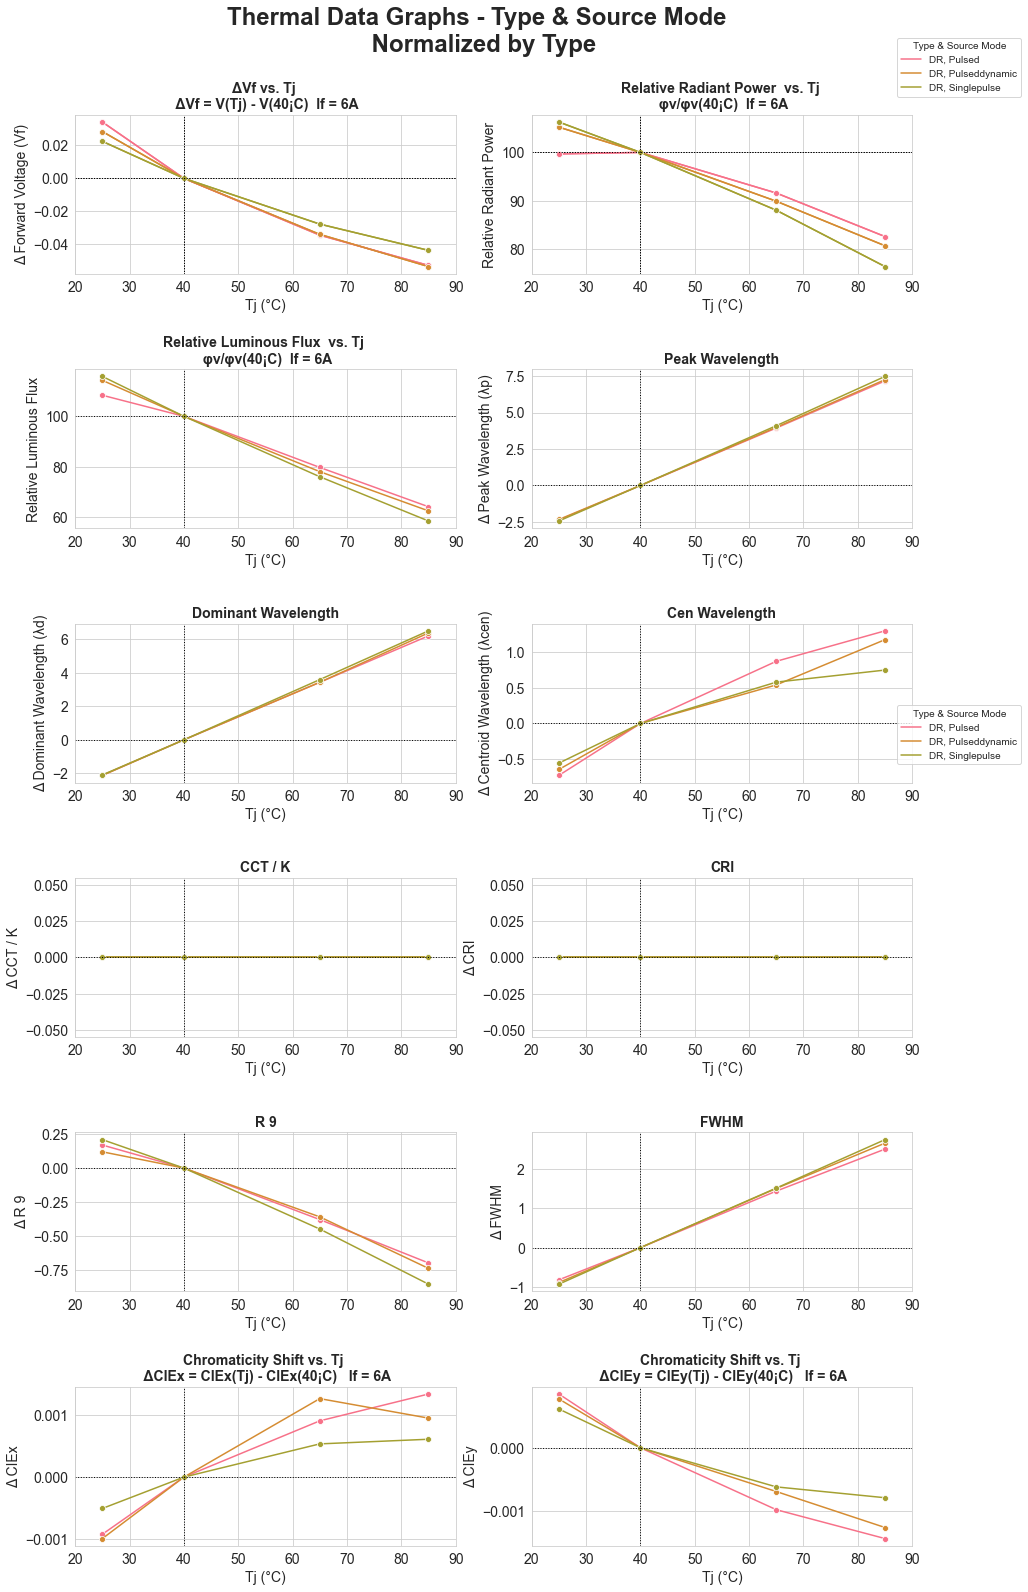

In [52]:
# Type & Source Graphs must be separate

# Thermal - By Type & Source Mode

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

#plt.figure('Thermal Data - By Type & Source Mode - ' + type_col[0] + ', ' + type_col[1], clear=True)
sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Thermal Data Graphs - Type & Source Mode \n Normalized by Type', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lineplot(ax=axes[d], x=xt, y=a, hue="Type & Source Mode", data=thermz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    c.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    c.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 & c2 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xt, y=y1, hue="Type & Source Mode", data=thermz, ci=False, marker='o')

axes[0,0].set_title(y1tt, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xt1, xt2))
c1.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
c1.axhline(thermz_m[y1] ,ls='dotted', color='black', linewidth=1)
c1.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.5, 1.3), ncol=1).set_title('Type & Source Mode')

c2 = sns.lineplot(ax=axes[0,1], x=xt, y=y2, hue="Type & Source Mode", data=thermz, ci=False, marker='o')

axes[0,1].set_title(y2tt, fontweight = 'bold', fontsize = 14)
c2.set(xlim=(xt1, xt2))
c2.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
c2.axhline(thermz_m[y2] ,ls='dotted', color='black', linewidth=1)
c2.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
c2.legend(loc='right', bbox_to_anchor=(1.3, -2.9), ncol=1).set_title('Type & Source Mode')
c2.set_zorder(1)

# pass the figure to the custom window
a = ScrollableWindow(f);
    
# Save the figure as png

if over == False:
    fname = output_f + '/' + name + '_' + h + '_therm_'
    version_png(fname)
else:
    f.savefig(output_f + '/' + name + '_' + h + '_therm.png')

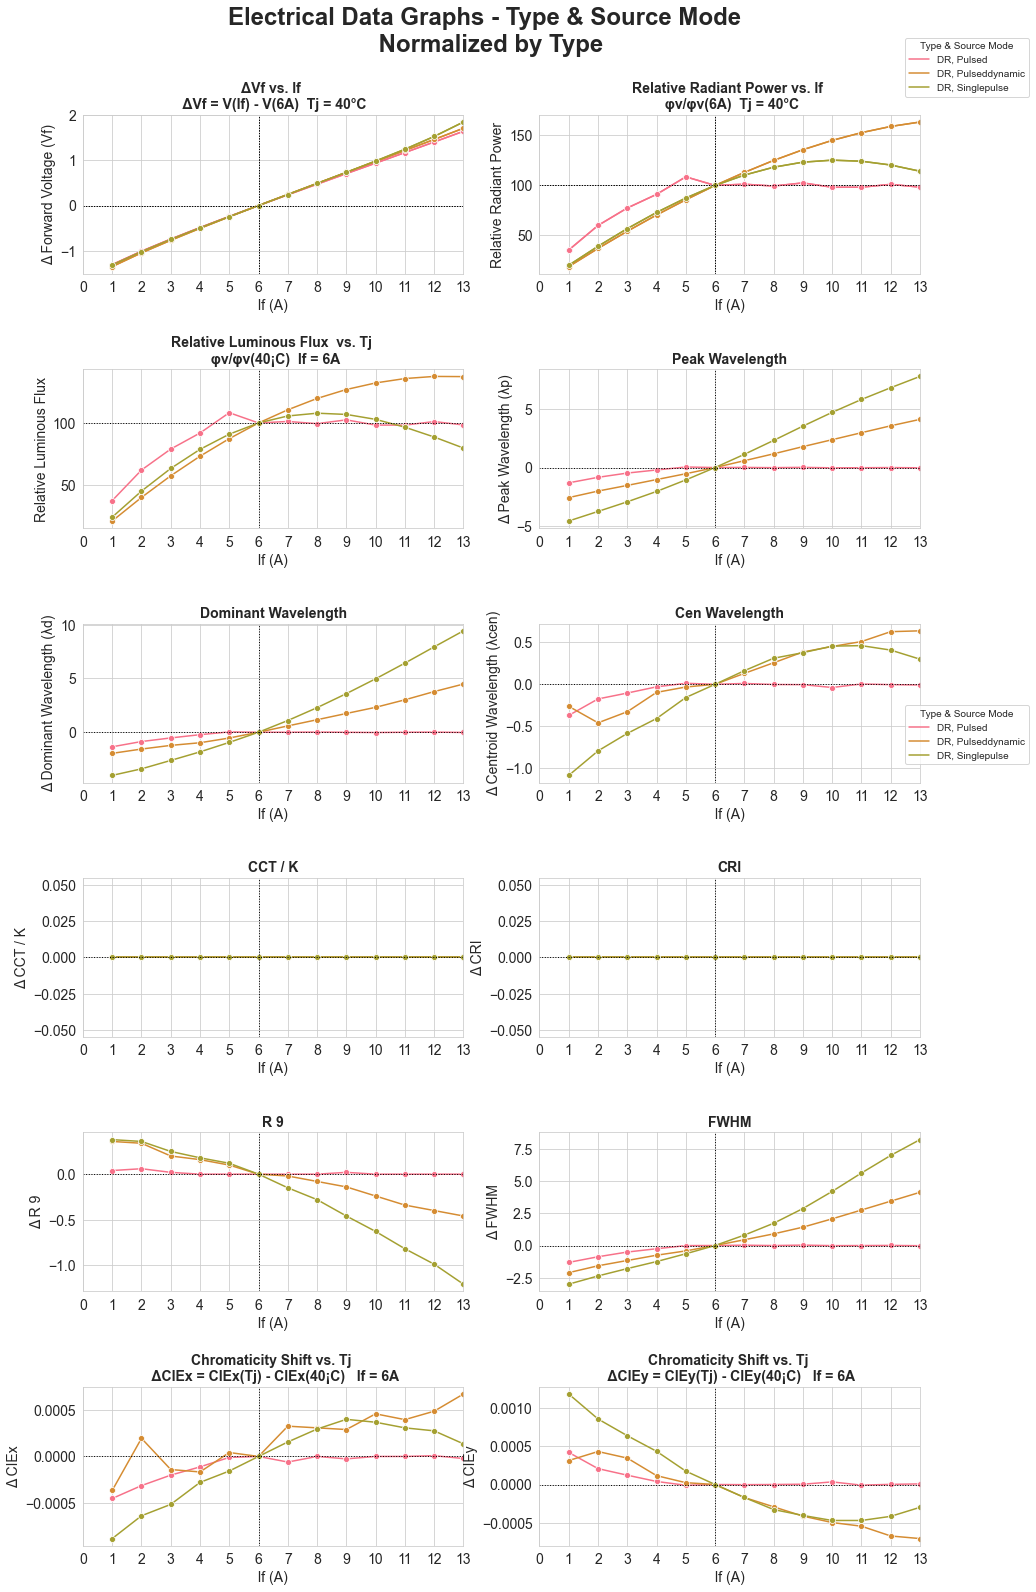

In [53]:
# Electrical by Type & Source Mode

#plt.figure('Electrical Data - By Type & Source Mode - ' + type_col[0] + ', ' + type_col[1], clear=True)
sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Electrical Data Graphs - Type & Source Mode \n Normalized by Type', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lineplot(ax=axes[d], x=xc, y=a, hue="Type & Source Mode", data=electz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    c.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    c.axvline(ref_current, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 & c2 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xc, y=y1, hue="Type & Source Mode", data=electz, ci=False, marker='o')

axes[0,0].set_title(y1te, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xe1, xe2))
c1.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
c1.axhline(electz_m[y1] ,ls='dotted', color='black', linewidth=1)
c1.axvline(ref_current, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.5, 1.3), ncol=1).set_title('Type & Source Mode')

c2 = sns.lineplot(ax=axes[0,1], x=xc, y=y2, hue="Type & Source Mode", data=electz, ci=False, marker='o')

axes[0,1].set_title(y2te, fontweight = 'bold', fontsize = 14)
c2.set(xlim=(xe1, xe2))
c2.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
c2.axhline(electz_m[y2] ,ls='dotted', color='black', linewidth=1)
c2.axvline(ref_current, ls='dotted', color='black', linewidth=1)
c2.legend(loc='right', bbox_to_anchor=(1.3, -2.9), ncol=1).set_title('Type & Source Mode')
c2.set_zorder(1)

# pass the figure to the custom window
a = ScrollableWindow(f);
    
# Save the figure as png

if over == False:
    fname = output_f + '/' + name + '_' + h + '_elect_'
    version_png(fname)
else:
    f.savefig(output_f + '/' + name + '_' + h + '_elect.png')

In [54]:
# Individual Thermal Graphs by Type
'''
for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lmplot(x=xt, y=a, hue="Type & Source Mode", data=thermz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                   aspect = 1.8)
    #plt.get_current_fig_manager().canvas.set_window_title(a + ' - Thermal Data by Type & Source Mode \n Normalized by Type')

    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    plt.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
    plt.axvline(xt2, color='0.8')
''';

In [55]:
# Individual Electrical Graphs by Source Mode
'''
for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lmplot(x=xc, y=a, hue="Type & Source Mode", data=electz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                    aspect = 1.8)
    #plt.get_current_fig_manager().canvas.set_window_title(a + ' - Electrical Data by Type & Source Mode \n Normalized by Type')
    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    plt.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_current, ls='dotted', color='black', linewidth=1)
    plt.axvline(xe2, color='0.8')
''';

In [56]:
# Export as Excel Worksheet if needed

if exp == True:
    with pd.ExcelWriter(output_f + '/' + name + '_' + h + '_output.xlsx') as writer:  
        thermz.to_excel(writer, sheet_name='Thermal Data', index=False)
        electz.to_excel(writer, sheet_name='Electrical Data', index=False)
else:
    pass

In [57]:
sys.exit()

SystemExit: 